# Insper

## Supercomputação - Avaliação Intermediária - 1º semestre de 2024

#### SEU NOME: Enricco Gemha

**Regras da prova**:

SOBRE HORÁRIOS:
- A prova estará liberada no Blackboard das 07h às 21h de 28/março/2024 (horário de Brasília);
- A prova tem duração aproximada de 03 horas (180 minutos);
-  O aluno poderá realizar a prova ao longo do dia, no(s) horário(s) e espaço(s) de tempo que melhor lhe convier. Ao iniciar a prova você não precisará ficar 3 horas seguidas na sua realização;

SOBRE DÚVIDAS:
- O professor NÃO estará disponível fisicamente no Insper. O aluno que quiser tirar dúvidas, poderá fazê-lo via grupo de WhatsApp da prova. O link é: https://chat.whatsapp.com/CBTOuOzyDrlIl0948pLYjd

SOBRE SUBMISSÕES DA PROVA E DO PROJETO:
- A submissão da prova deve ser feita impreterivelmente até às 21h de 28/março/2024 (horário de Brasília). NÃO serão aceitas submissões após este horário;
- O aluno poderá fazer múltiplas submissões da prova. O sistema considerará a última submissão como oficial;
- A submissão da prova pode ser a resolução no jupyter notebook exportado no Colab ou ZIP com arquivos “.cpp” devidamente sinalizados (a qual questão se referenciam);
- Da mesma forma acima, sua submissão intermediária _opcional_ do projeto já pode ser feita no link apropriado do Blackboard. O horário final é o mesmo da prova;

SOBRE A RESOLUÇÃO DA PROVA:
- A interpretação do enunciado faz parte da avaliação;
- É permitida a consulta ao material da disciplina (tudo o que estiver no repositório do Github da disciplina e no site http://insper.github.io/supercomp. Isso também inclui suas próprias soluções aos exercícios de sala de aula, mas não inclui materiais não digitais, tampouco outros materiais além dos citados;
- É permitido consultar a documentação de C++ nos sites oficiais e links extras dos próprios enunciados;
- Seu pseudocódigo deve ser feito em Português, incluindo nomes de variáveis e comentários;


SOBRE QUESTÕES DE ÉTICA E PLÁGIO:
- A prova é individual. Qualquer consulta a outras pessoas durante a prova constitui violação do código de ética do Insper;
- Qualquer tentativa de fraude, como trechos idênticos ou muito similares, implicará em NOTA ZERO na prova a todos os envolvidos, sem prejuízo de outras sanções.

**_Boa prova!_**


# [1,5 pontos] Questão 01 - Problema do Subconjunto de Soma

**Contexto:**

O Problema do Subconjunto de Soma é um desafio clássico em ciência da computação e matemática, que se enquadra na categoria de problemas NP-Completo. Ele questiona se, dado um conjunto de números inteiros e um valor alvo, existe um subconjunto desses números cuja soma é igual ao valor alvo. Apesar de sua simplicidade conceitual, resolver este problema pode se tornar computacionalmente intensivo à medida que o tamanho do conjunto aumenta, tornando abordagens exaustivas impraticáveis para grandes conjuntos. Portanto, heurísticas e métodos aproximados se tornam ferramentas valiosas para encontrar soluções em tempo razoável.

**Questão:**

Considere um conjunto \( S = \{s_1, s_2, ..., s_n\} \) de números inteiros positivos e um valor alvo \( T \). Seu objetivo é desenvolver uma heurística para determinar se existe um subconjunto de \( S \) cuja soma é igual a \( T \). Sua solução não precisa ser ótima, mas deve ser capaz de encontrar uma resposta em um tempo razoável, mesmo para grandes valores de \( n \).

Para atingir este objetivo, você deve implementar o seguinte algoritmo heurístico em C++:

1. **Pré-processamento:** Ordene os números em \( S \) em ordem decrescente. Este passo visa a maximizar a eficiência da sua heurística, permitindo que grandes somas sejam alcançadas rapidamente, potencialmente aproximando-se de \( T \) mais rapidamente.

2. **Heurística de Aproximação:** Implemente uma função que percorra os números em \( S \) na ordem definida. Para cada número \( s_i \), decida se deve ou não incluí-lo no subconjunto candidato com base em uma regra heurística simples.

3. **Verificação e Saída:** Se, ao final do processo, a soma dos números no subconjunto candidato for igual a \( T \), sua função deve retornar `true`, indicando que uma solução foi encontrada. Caso contrário, retorne `false`.

**Pede-se**:
1. Implemente o algoritmo heurístico descrito acima em C++. (entregue o código)
2. Discuta a eficácia da sua heurística. Em que cenários ela pode falhar em encontrar um subconjunto existente que some \( T \)? (entregue sua resposta justificada)


**DICA**:

Uma possível assinatura da sua função é:
```cpp
bool subsetSum(const vector<int>& set, int sum);
```





## Respostas

1. Função implementada:

```cpp
#include <iostream>
#include <algorithm>
#include <vector>

bool subsetSum(const std::vector<int>& set, int sum) {
  std::vector<int> sortedSet = set;
  // Método de sorting extraído de: https://www.geeksforgeeks.org/sort-c-stl/
  std::sort(sortedSet.rbegin(), sortedSet.rend());

  int currentSum = 0;
  int i = 0;

  while (i < sortedSet.size() && currentSum < sum) {
    if (currentSum + sortedSet[i] <= sum) {
      currentSum += sortedSet[i];
      i++;
    } else {
      i++;
    }
  }

  return currentSum == sum;
}
```

2. A heurística funciona bem quando a solução depende dos maiores números, mas pode falhar quando houver um número muito grande, porém menor que a soma, que impeça que combinações que estejam mais próximas do meio e fim possam ser encontradas. Um exemplo disso seriam os seguintes inputs: ({10,9,8,7,6,3}, 23) e ({99,4,3,2}, 104). 

# [1,5 pontos] Questão 02 - Solução Ótima

A solução ótima do problema anterior é verificar todos os subconjuntos possíveis dos números de ( S ), calcular a soma de cada um deles e verificar se alguma destas soma é igual ao valor buscado. Essa solução, embora simples, pode não escalar bem para grandes entradas.


**Pede-se**:
1. Escreva o código da solução ótima em C++ (você pode usar recursão ou não)
;
2. Gere a solução para 10 entradas distintas em ordens de grandeza diferentes (algumas entradas pequenas, algumas médias, algumas grandes);
3. Compare o tempo de execução deste código nas 10 entradas. O comportamento está alinhado com o esperado? Justifique.


## Resposta

1. A melhor maneira de abordar essa solução ótima é através de uma árvore de recursão. Segue minha implementação abaixo:

```cpp
#include <iostream>
#include <vector>

bool subsetSum(const std::vector<int>& set, int sum) {
  if (sum == 0) {
    return true;
  }
  if (set.empty()) { 
    return false;
  }

  if (set.back() > sum) {
    return subsetSum(std::vector<int>(set.begin(), set.end() - 1), sum);
  }

    return subsetSum(std::vector<int>(set.begin(), set.end() - 1), sum) || 
           subsetSum(std::vector<int>(set.begin(), set.end() - 1), sum - set.back()); 
}
```

2. O main() do arquivo, onde estão os testes segue abaixo:

```cpp
int main() {
  std::vector<std::vector<int>> sets = {{1, 2, 3},
                                        {1, 2, 3, 4},
                                        {1, 2, 3, 4, 5},
                                        {1, 2, 3, 4, 5, 6},
                                        {1, 2, 3, 4, 5, 6, 7},
                                        {1, 2, 3, 4, 5, 6, 7, 8},
                                        {1, 2, 3, 4, 5, 6, 7, 8, 9},
                                        {1, 2, 3, 4, 5, 6, 7, 8, 9, 10},
                                        {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11},
                                        {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}};
  std::vector<int> sums = {5, 10, 15, 20, 25, 30, 35, 40, 45, 50};

  for (int i = 0; i < sets.size(); i++) {
    bool exists = subsetSum(sets[i], sums[i]);
    std::cout << "Conjunto " << i + 1 << " (" << sets[i].size() << " elementos): " << (exists ? "Sim" : "Não") << std::endl;
  }

  return 0;
}
```

3. O comportamento está alinhado com o esperado, que é o de ser o mais eficiente possível no runtime, com um tempo de execução total de 0.01s, o que é bem pouco, como pode ser visto no print abaixo:

![Runtime](./question02/execution.png)

# [1,0 ponto] Questão 03 - Aleatorização

Em sala de aula, nós implementamos diversas estratégias para a mochila
binária. Explique a importância de buscar um balanço entre _exploration_ e _exploitation_. Dê um exemplo de como buscamos atingir _exploration_ e outro de como buscamos atingir _exploitation_ no Problema do Subconjunto de Soma. Elabore um pseudocódigo que combine tais estratégias e avalie criticamente sua efetividade.

## Resposta

Como pudemos observar com a resolução dos exercícios 1 e 2, é importante balancear _exploration_ e _exploitation_, para que não nos encontremos em um aprisionamento de mínimo ou máximo local, ou que tenhamos problemas de eficiência.

Um exemplo de _exploitation_ no SubsetSum é a função desenvolvida na questão 1, que utiliza do iteração greedy (gananciosa), valorizando soluções que contenham os valores mais altos possíveis. Um exemplo de _exploration_ é a estrutura recursiva da função da questão 2, que explora diferentes ramos do espaço de busca. Em cada chamada recursiva, o problema é dividido em subproblemas menores considerando incluir ou excluir o último elemento do conjunto. Isso evita que se fique preso a uma única sequência de decisões.

O pseudocódigo foi escrito em Python, combinando ambas as soluções, com heurística do Mais Caro/Leve:
```py
def subset_sum_combinada(set, sum, limite_profundidade):
  if sum == 0:
    return []
  if set.empty() or limite_profundidade == 0:
    return None

  ordenado = sorted(set, reverse=True)
  melhor_solucao = None

  for i in range(len(ordenado)):
    if ordenado[i] <= sum:
      solucao_rec = subset_sum_combinada(ordenado[i+1:], sum - ordenado[i], limite_profundidade - 1)
      if solucao_rec is not None:
        solucao_completa = [i] + solucao_rec
        if melhor_solucao is None or sum(solucao_completa) > sum(melhor_solucao):
          melhor_solucao = solucao_completa

  return melhor_solucao
```

# [2,0  pontos] Questão 04 - Profiling

Abaixo temos um programa de simulação de uma matriz que está sendo preenchida, o que é comum em muitos programas científicos, de engenharia e de análise de dados. O programa utiliza a multiplicação de matrizes, que pode ser otimizada de várias maneiras.

**Atenção**: esse código leva um pouco de tempo para executar sob o Valgrind. Organize seu tempo de prova para isso.

Sua tarefa:

1. Compile e execute o programa C++ fornecido, que realiza a multiplicação de duas matrizes de tamanho 300x300.
2. Use a ferramenta Callgrind do Valgrind para analisar o desempenho do programa.
3. Analise o arquivo gerado com a ferramenta callgrind_annotate.
4. Identifique as partes do código que são mais exigentes em termos de uso de CPU e número de instruções executadas. Verifique se há oportunidades para otimizar o código.
5. Modifique o código para melhorar o desempenho, recompile e execute o Callgrind novamente para comparar os resultados.
6. Faça um gráfico que possibilite acompanhar as duas abordagens computacionais (a fornecidade nessa prova e a sua proposta de modificação). O eixo X deve ser o tamanho N (lembre-se é uma matriz quadrada) e o eixo Y deve ser o tempo em segundos. O gráfico deve evidenciar que a sua abordagem é mais eficiente. <font color="red">Atente-se que a implementação do item 6 tem valor de 1 ponto, correspondente a 50% do valor da questão</font>.



Código-fonte:

```cpp
#include <iostream>
#include <vector>

// Função para multiplicar duas matrizes
std::vector<std::vector<int>> multiplicarMatrizes(const std::vector<std::vector<int>>& a,
                                                 const std::vector<std::vector<int>>& b) {
    int n = a.size();
    int m = a[0].size();
    int p = b[0].size();
    
    std::vector<std::vector<int>> c(n, std::vector<int>(p, 0));

    for (int i = 0; i < n; ++i) {
        for (int j = 0; j < p; ++j) {
            for (int k = 0; k < m; ++k) {
                c[i][j] += a[i][k] * b[k][j];
            }
        }
    }

    return c;
}

int main() {
    int tamanho = 300; // Tamanho da matriz
    std::vector<std::vector<int>> a(tamanho, std::vector<int>(tamanho, 1));
    std::vector<std::vector<int>> b(tamanho, std::vector<int>(tamanho, 2));

    // Multiplicação das matrizes
    auto resultado = multiplicarMatrizes(a, b);

    std::cout << "Multiplicação de matrizes concluída." << std::endl;

    return 0;
}
```

# [1,5 pontos] Questão 05 - Busca global

Um algoritmo de busca global, em termos gerais, é um algoritmo de otimização que procura encontrar a melhor solução possível para um problema dentro de um espaço de busca, considerando todas as possíveis soluções. Em outras palavras, ele tenta encontrar o máximo ou mínimo global de uma função objetivo em um domínio especificado.

Em alguns problemas a "busca global" não se trata de uma otimização, mas de encontrar a única resposta correta possível. Por exemplo, o cálculo de Fibonacci é algoritmo que dado um número `N`, o `fib(N)` assume apenas um valor correto.

Observe o código abaixo para cálculo do Fibonacci. Altere o programa para receber `N` como uma entrada, e rode o programa para alguns valores de N, tanto pequenos (abaixo de 30) quanto grandes (acima de 30 --- só não exagere!), comparando os tempos de execução.  

Código-fonte:

```cpp
#include <iostream>

int fib(int n) {
    if (n <= 1) {
        return n;
    } else {
        return fib(n - 1) + fib(n - 2);
    }
}

int main() {
    int n = 30; // Valor de n para calcular Fibonacci
    int result = fib(n);
    std::cout << "Fibonacci de " << n << " é " << result << std::endl;
    return 0;
}
```

Note que tempo de execução para esta implementação aumenta consideravelmente quando `N` cresce.

**Pedes-se**: Implemente  uma otimização para esse algoritmo de modo que sua implementação seja pela abordagem de memorização (*memoization*), ou seja, salvar cálculos já realizados para reaproveitá-los. Apresente código-fonte, resultados e compare os resultados de tempo de execução obtidos.

## Respostas

A implementação do código com Memoization é:

```cpp
#include <iostream>

int fib(int n, int cache[]) {
    if (n <= 1) {
        return n;
    } else {
	if (cache[n] == 0) {
            cache[n] = fib(n-1, cache) + fib(n-2, cache);
        }
        return cache[n];
    }
}

int main() {
    int n = 30; // Valor de n para calcular Fibonacci
    int cache[n + 1] = {0};
    int result = fib(n, cache);
    std::cout << "Fibonacci de " << n << " é " << result << std::endl;
    return 0;
}
```

O runtime é bem menor na versão de Memoization (0.01s) contra a versão Naive (0.04s).
Se observarmos a quantidade de eventos coletados, também podemos observar uma diferença muito grande entre ambas, sendo a com Memoization bem menor.

![Runtime Memo vs Naive](./question05/runtime_memo_vs_naive.png)

# [1,5 pontos] Questão 06 - Encontrando o Caminho Mais Curto em uma Rede de Estradas

Suponha que você está trabalhando em um aplicativo de navegação GPS e precisa desenvolver uma funcionalidade para encontrar o caminho mais curto entre duas cidades em uma rede de estradas. Você tem informações sobre as estradas e distâncias entre as cidades.

Aqui está a descrição da situação:

- Você recebe um conjunto de dados que descreve a rede de estradas (arestas) entre as cidades (vértices)
- Cada cidade é representada por um vértice no grafo, e cada estrada é representada por uma aresta com um `peso` que indica a distância entre as cidades que conecta.
- As cidades são numeradas, por exemplo, 0, 1, 2, 3, 4, 5.
- Você precisa criar uma função que, dado o grafo das estradas e duas cidades de origem e destino, encontre o caminho mais curto (menor distância) entre essas duas cidades.

_Por exemplo_: Considere o grafo da imagem abaixo

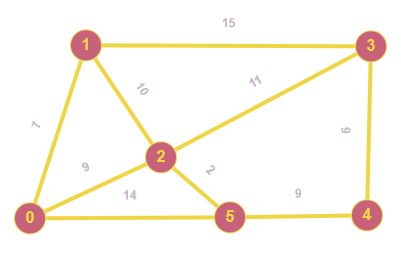


Tal grafo é representado pelo seguinte arquivo de entrada:

```txt
6 18   // Número de cidades e número de entradas
0 1 7  // Cada linha contém os IDs das cidades de início e fim da estrada e seu peso
0 2 9
0 5 14
1 0 7
1 2 10
1 3 15
2 0 9
2 1 10
2 3 11
2 5 2
3 1 15
3 2 11
3 4 6
4 3 6
4 5 9
5 0 14
5 2 2
5 4 9
3      // Quantidade de caminhos a serem calculados
0 4    // Cada linha contém os IDs das cidades de origem e destino daquele caminho
1 3
5 0
```

Para a entrada acima o output do programa deve ser:

```txt
Caminho mais curto de 0 para 4: 0 2 5 4
Caminho mais curto de 1 para 3: 1 3
Caminho mais curto de 5 para 0: 5 2 0
```

Questão:

1. Dado o grafo das estradas e suas distâncias, complete o código abaixo implementando em C++ o **algoritmo de Dijkstra**, que encontra o caminho mais curto entre duas cidades de origem e destino. O pseudocódigo e algumas dicas estão fornecidas abaixo.

2. Teste seu código com (a) a entrada/saída do exemplo dado e (b) o par abaixo. Se quiser, fique à vontade para desenhar outros grafos e propor outras entradas/saídas.

3. Explique brevemente como o algoritmo de Dijkstra funciona, refletindo sobre sua complexidade computacional. Indique a partir de qual tamanho de entrada (em termos de vértices e arestas), a computação fica inviável em termos de tempo de execução, justificando sua resposta.  

```cpp
#include <iostream>
#include <vector>
#include <queue>
#include <limits>
#include <algorithm>

using namespace std;

// Definindo uma estrutura para representar um nó no grafo ponderado
struct Node {
    int id;
    int distance;

    Node(int _id, int _distance) : id(_id), distance(_distance) {}

    // Sobrecarregando o operador "<" para usar com uma fila de prioridade
    bool operator<(const Node& other) const {
        return distance > other.distance;
    }
};

// Assinatura da função para encontrar o caminho mais curto usando o algoritmo de Dijkstra. Sua implementação deve obedecer esta assinatura. Inclua aqui o seu código.
vector<int> dijkstra(const vector<vector<pair<int, int>>>& graph, int source, int destination);


vector<vector<pair<int, int>>> le_grafo() {
  int N;         // Número de cidades
  int E;         // Número de estradas
  int i, f, p;   // Início, fim e peso da estrada
  
  cin >> N >> E;
  
  vector<vector<pair<int, int>>> graph(N);
  for (int x=0; x<E; x++) {
    cin >> i >> f >> p;
    graph[i].push_back({f, p});  // ida
    graph[f].push_back({i, p});  // volta
  }

  return graph;
}


vector<vector<pair<int, int>>> le_caminhos() {
  int C;         // Número de caminhos a serem calculados
  int o, d;      // Início e fim

  cin >> C;
  
  vector<vector<pair<int, int>>> caminhos(C);
  for (int x=0; x<C; x++) {
    cin >> o >> d;
    caminhos[x].push_back({o, d});
  }

  return caminhos;  
}


int main() {

    // Lê os dados
    vector<vector<pair<int, int>>> graph = le_grafo();
    vector<vector<pair<int, int>>> caminhos = le_caminhos();

    // Calculando e exibindo os resultados
    for (auto& p : caminhos){
      int origem = p[0].first;   // origem
      int destino = p[0].second; // destino

      // Encontrando o caminho mais curto entre origem e destino
      vector<int> path = dijkstra(graph, origem, destino);

      // Imprimindo a resposta
      cout << "Caminho mais curto de " << origem << " para " << destino << ": ";
      for (int node : path) {
        cout << node << " ";
      }
      cout << endl;
    }

    return 0;
}

```

_Pseudocódigo do Algoritmo de Dijkstra_:


```
Função dijkstra(graph, source, destination):
    numNodes = Tamanho do grafo
    Declare distance[numNodes] e previous[numNodes]
    Inicialize distance com valores infinitos e previous com -1
    
    distance[source] = 0
    Declare uma fila de prioridade pq
    
    pq.inserir(Nó(source, 0))  # Insira o nó de origem na fila com distância zero
    
    Enquanto pq não estiver vazia:
        current = pq.remover()  # Remova o nó com a menor distância da fila
        u = current.id
        
        Se u igual a destination:
            # Chegamos ao destino, pare a busca
            Pare o loop
        
        Para cada vizinho em graph[u]:
            v = vizinho.id
            weight = vizinho.peso
            
            Se distance[u] + weight < distance[v]:
                distance[v] = distance[u] + weight
                previous[v] = u
                pq.inserir(Nó(v, distance[v]))  # Atualize a fila de prioridade
                
    # Reconstrua o caminho a partir do destino para a origem
    Declare path como uma lista vazia
    current = destination
    
    Enquanto current diferente de -1:
        Adicione current ao início de path
        current = previous[current]
    
    Inverta a lista path

    Retorne path

```

_Dicas sobre a implementação do pseudocódigo_:

- Os `#include` necessários já foram feitos. Você pode utilizar outros se precisar;
- Utilize uma fila de prioridade para armazenar a visita aos nós. Isso otimiza o tempo de execução. A fila de prioridade está implementada na biblioteca `queue`, sob o nome `priority_queue`. Veja [aqui](https://cplusplus.com/reference/queue/priority_queue/) uma documentação, se precisar;
- O grafo representado na variável `vector<vector<pair<int, int>>> graph` na verdade é uma lista de listas de pares. Cada [par](https://cplusplus.com/reference/utility/pair/) é uma estrutura (tupla) denominada `pair`, cujos primeiros e segundos valores são acessados pelos membros públicos `first` and `second`;
- Lembre que você pode inicializar variáveis de forma mais simples na própria declaração;
- Você pode assumir que os pesos das arestas serão sempre inteiros. Utilize `numeric_limits<int>::max()` para representar o valor "infinito".


_Entrada e Saída extras_:

IN
```txt
8 8  
0 1 3
1 3 9
3 4 8
3 5 10
3 6 15
6 7 2
4 2 3
4 5 7
6
7 2  
0 5
1 2
2 6
2 1
5 1
```

OUT
```txt
Caminho mais curto de 7 para 2: 7 6 3 4 2
Caminho mais curto de 0 para 5: 0 1 3 5
Caminho mais curto de 1 para 2: 1 3 4 2
Caminho mais curto de 2 para 6: 2 4 3 6
Caminho mais curto de 2 para 1: 2 4 3 1
Caminho mais curto de 5 para 1: 5 3 1
```

# [1.0 ponto] Questão 07 - Uso de Cluster em Supercomputação

Esta disciplina estuda estratégias para resolver problemas complexos em tempo computacionalmente razoável.

**Pede-se**:
1. Qual é a importância de aliar estratégias de implementação (Software) com recursos computacionais disponíveis (Hardware) para melhor endereçamento do problema?
2. Considerando a administração de um cluster, existem diversas estratégias que permitem e alocação mais adequada dos jobs nas máquinas de computação. Discorra sobre tais estratégias analisando-as criticamente em termos de efetividade e viabilização.

Resposta 1: É crucial aliar estratégias de implementação (Software) com recursos computacionais disponíveis (Hardware) para melhor endereçamento do problema, pois saber adaptar o algoritmo para a arquitetura em que ele irá rodar pode melhor muito sua eficiência, como é o caso de otimizar a solução de um problema para paralelismo. Isso também pode ser encontrado na raiz do conceito de exploitation.